<a href="https://colab.research.google.com/github/hwarang97/Image_classification/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%99%95%EC%9D%B8_%EB%B0%8F_%EC%82%AC%EC%9A%A9%EC%9E%90%EC%A0%95%EC%9D%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%EC%9A%A9%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
training_data = torchvision.datasets.FashionMNIST( # (60000, 28, 28)
    root='./data/',
    train = True,
    transform = ToTensor(),
    download=True,
)

test_data = torchvision.datasets.FashionMNIST(
    root='./data/',
    train=False,
    transform=ToTensor(),
    download=True,
)

train_dataloader = DataLoader(training_data, batch_size=128)
test_dataloader = DataLoader(test_data, batch_size=128)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



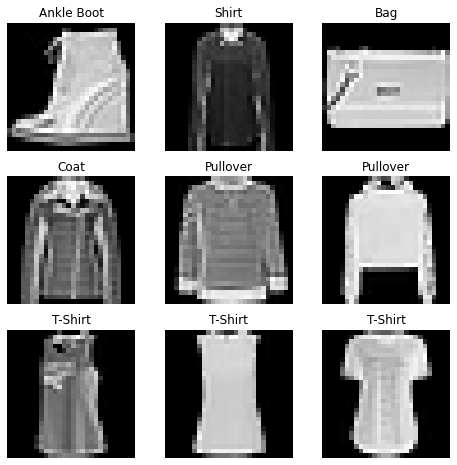

In [3]:
# 데이터셋이 제대로 들어갔는지 시각화해서 확인

labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, rows*cols+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item() # Tensor에서 값이 하나만 있는 걸 꺼낼때 사용
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off') # 축 눈금등을 없애주는 메소드, 기본값:True
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

# 파일에서 사용자 정의 데이터셋 만들기

In [4]:
import os
import pandas as pd
from torchvision.io import read_image # ???
from torch.utils.data import Dataset

In [5]:
# 사용자정의 Dataset 클래스는 반드시 3개 함수를 구현해야 함

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path) # 지정된 경로의 이미지를 불러와 텐서로 바꿈
    label = self.img_labesl.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_tranform(image):
      label = self.target_transform(label)
    sample = {'image' : image, 'label' : label}
    return sample

In [6]:
# DataLoader 객체는 iterable한 객체
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) # suffle : 에포치마다 섞기
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True) # Tensor 이미지가 batch_size만큼 묶임

Feature batch shape: torch.Size([64, 1, 28, 28])
Lables batch shape: torch.Size([64])


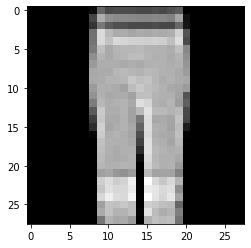

Label: 1


In [7]:
# 이미지와 정답을 표시합니다
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Lables batch shape: {train_labels.size()}')
img = train_features[0].squeeze() # 텐서에 속해있는 1 값을 빼주는 역할 예) train_features[0] : [1, 28, 28]
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')